In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

In [94]:
raw_df = pd.read_csv("../DataSets/movies_metadata.csv")

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [95]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [96]:
len(df)

45463

In [97]:
c_df = raw_df[['budget','popularity','revenue','runtime','vote_average','vote_count','title','adult']]

In [98]:
c_df.head(10)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,adult
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story,False
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji,False
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,False
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale,False
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,False
5,60000000,17.9249,187436818.0,170.0,7.7,1886.0,Heat,False
6,58000000,6.67728,0.0,127.0,6.2,141.0,Sabrina,False
7,0,2.56116,0.0,97.0,5.4,45.0,Tom and Huck,False
8,35000000,5.23158,64350171.0,106.0,5.5,174.0,Sudden Death,False
9,58000000,14.686,352194034.0,130.0,6.6,1194.0,GoldenEye,False


In [99]:
c_df[c_df.vote_average > 9]

,budget,popularity,revenue,runtime,vote_average,vote_count,title,adult
186,0,0.119713,0.0,91.0,10.0,1.0,Reckless,False
394,0,0.405392,0.0,89.0,10.0,1.0,Girl in the Cadillac,False
706,0,0.037443,0.0,112.0,10.0,1.0,"The Haunted World of Edward D. Wood, Jr.",False
738,0,0.146287,0.0,91.0,10.0,1.0,Carmen Miranda: Bananas Is My Business,False
1634,0,0.03668,0.0,0.0,10.0,1.0,Other Voices Other Rooms,False
1761,0,0.567444,565592.0,97.0,10.0,1.0,"Dancer, Texas Pop. 81",False
2114,0,0.211754,0.0,18.0,10.0,1.0,The Farmer's Wife,False
2124,0,0.996778,0.0,121.0,9.3,2.0,One Man's Hero,False
2653,0,0.882132,0.0,99.0,10.0,1.0,Stiff Upper Lips,False
2948,0,0.064219,0.0,108.0,10.0,1.0,Ten Benny,False


In [100]:
c_df.dtypes

budget           object
popularity       object
revenue         float64
runtime         float64
vote_average    float64
vote_count      float64
title            object
adult            object
dtype: object

In [101]:
#Mapping True to 1 and False to 0
m = {'True':1,'False':0}
c_df['adult'] = c_df['adult'].map(m)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
c_df.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,adult
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story,0.0
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji,0.0
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,0.0
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale,0.0
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,0.0


In [21]:
c_df.adult.dtype

dtype('float64')

In [24]:
c_df['budget']=pd.to_numeric(c_df.budget,downcast='unsigned')

ValueError: Unable to parse string "/ff9qCepilowshEtG2GYWwzt2bs4.jpg" at position 19730

In [103]:
c_df.drop(c_df.index[19730],inplace=True)
c_df.drop(c_df.index[29502],inplace=True)
c_df.drop(c_df.index[35585],inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [104]:
c_df.dtypes

budget           object
popularity       object
revenue         float64
runtime         float64
vote_average    float64
vote_count      float64
title            object
adult           float64
dtype: object

In [105]:
c_df.isnull().sum()

budget            0
popularity        3
revenue           3
runtime         260
vote_average      3
vote_count        3
title             3
adult             0
dtype: int64

In [106]:
c_df.dropna(inplace=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
c_df.isnull().sum()

budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
title           0
adult           0
dtype: int64

#### Let's see and analyze the statistics for the movies data

In [108]:
c_df.describe()

,revenue,runtime,vote_average,vote_count,adult
count,4.520300e+04,45203.000000,45203.000000,45203.000000,45203.000000
mean,1.127300e+07,94.128199,5.629368,110.506515,0.000199
std,6.450932e+07,38.407810,1.908909,492.638190,0.014109
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000,0.000000
50%,0.000000e+00,95.000000,6.000000,10.000000,0.000000
75%,0.000000e+00,107.000000,6.800000,34.000000,0.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000,1.000000


You can also choose specific percentiles to be included in the describe method output by adding the percentiles argument and specifying. 

In [109]:
c_df.describe(percentiles=[.10,.30,.50,.60,.75,.90])

,revenue,runtime,vote_average,vote_count,adult
count,4.520300e+04,45203.000000,45203.000000,45203.000000,45203.000000
mean,1.127300e+07,94.128199,5.629368,110.506515,0.000199
std,6.450932e+07,38.407810,1.908909,492.638190,0.014109
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
10%,0.000000e+00,64.000000,3.600000,1.000000,0.000000
30%,0.000000e+00,88.000000,5.300000,4.000000,0.000000
50%,0.000000e+00,95.000000,6.000000,10.000000,0.000000
60%,0.000000e+00,99.000000,6.300000,15.000000,0.000000
75%,0.000000e+00,107.000000,6.800000,34.000000,0.000000
90%,8.519627e+06,123.000000,7.400000,161.000000,0.000000


“Percentile” is in everyday use, but there is no universal definition for it. The most common definition of a percentile is a number where a certain percentage of scores fall below that number. You might know that you scored 67 out of 90 on a test. But that figure has no real meaning unless you know what percentile you fall into. If you know that your score is in the 90th percentile, that means you scored better than 90% of people who took the test.

So, from the above data and the definition we can infer that, for say the popularity column there, 8.35 is the score where you could say that the movies with popularity score above 8.35 fall in the category of the movies which were liked by 90% of the people who voted. i.e. this movie with score 8.35 falls in the category which was liked by 90% of the who voted.

In [110]:
c_df['vote_count'].describe()

count    45203.000000
mean       110.506515
std        492.638190
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

We see that a half of movies have been rated less than 10 times.
Let's see only the movies that have more than 30 votes, i.e. top 26% of the movies.

In [111]:
c_df['vote_count'].quantile(np.arange(.74,1,0.01))

0.74      32.00
0.75      34.00
0.76      37.00
0.77      40.00
0.78      43.00
0.79      46.00
0.80      51.00
0.81      55.00
0.82      61.00
0.83      67.00
0.84      74.00
0.85      83.00
0.86      92.00
0.87     104.74
0.88     119.00
0.89     139.00
0.90     161.00
0.91     193.00
0.92     230.00
0.93     283.00
0.94     349.00
0.95     435.90
0.96     581.00
0.97     827.94
0.98    1243.88
0.99    2196.84
Name: vote_count, dtype: float64

### Normalizing the data

What is normalization and Why there is need to normalize data???

 In most cases, when you normalize data you eliminate the units of measurement for data, enabling you to more easily compare data from different places. Some of the more common ways to normalize data include:

    Transforming data using a z-score or t-score. This is usually called standardization. In the vast majority of cases, if a statistics textbook is talking about normalizing data, then this is the definition of “normalization” they are probably using.
    Rescaling data to have values between 0 and 1. This is usually called feature scaling. One possible formula to achieve this is:
        x_new = (x - x_min)/(x_max - x_min)
    Standardizing residuals: Ratios used in regression analysis can force residuals into the shape of a normal distribution.
    Normalizing Moments using the formula μ/σ.
    Normalizing vectors (in linear algebra) to a norm of one. Normalization in this sense means to transform a vector so that it has a length of one.


Normalization vs. Standardization

The terms normalization and standardization are sometimes used interchangeably, but they usually refer to different things. Normalization usually means to scale a variable to have a values between 0 and 1, while standardization transforms data to have a mean of zero and a standard deviation of 1. This standardization is called a z-score, and data points can be standardized with the following formula:
z = (x – μ) / σ

In [112]:
from sklearn import preprocessing

In [113]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(c_df.drop(['title','adult'],axis=1))

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [114]:
minmax_processed

array([[7.89473684e-02, 4.00865974e-02, 1.33988060e-01, 6.44904459e-02,
        7.70000000e-01, 3.84724689e-01],
       [1.71052632e-01, 3.10792743e-02, 9.42613127e-02, 8.28025478e-02,
        6.90000000e-01, 1.71438721e-01],
       [0.00000000e+00, 2.13938819e-02, 0.00000000e+00, 8.04140127e-02,
        6.50000000e-01, 6.53641208e-03],
       ...,
       [0.00000000e+00, 1.64936311e-03, 0.00000000e+00, 7.16560510e-02,
        3.80000000e-01, 4.26287744e-04],
       [0.00000000e+00, 6.39831027e-06, 0.00000000e+00, 6.92675159e-02,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.97750656e-04, 0.00000000e+00, 5.97133758e-02,
        0.00000000e+00, 0.00000000e+00]])

In [115]:
p_df = pd.DataFrame(minmax_processed,index=c_df.index,columns=c_df.columns[:-2])

In [116]:
p_df

,budget,popularity,revenue,runtime,vote_average,vote_count
0,0.078947,0.040087,0.133988,0.064490,0.77,0.384725
1,0.171053,0.031079,0.094261,0.082803,0.69,0.171439
2,0.000000,0.021394,0.000000,0.080414,0.65,0.006536
3,0.042105,0.007049,0.029216,0.101115,0.61,0.002416
4,0.000000,0.015320,0.027468,0.084395,0.57,0.012291
5,0.157895,0.032740,0.067231,0.135350,0.77,0.133996
6,0.152632,0.012196,0.000000,0.101115,0.62,0.010018
7,0.000000,0.004678,0.000000,0.077229,0.54,0.003197
8,0.092105,0.009556,0.023081,0.084395,0.55,0.012362
9,0.152632,0.026824,0.126327,0.103503,0.66,0.084831


### Applying k-Means

In [117]:
# What k to choose
Nc = range(1, 20) #no. of clusters
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [118]:
score=[]
for i in range(len(kmeans)):
    score.append(kmeans[i].fit(p_df).score(p_df))


These score values signify how far our observations are from the cluster center. We want to keep this score value around 0. A large positive or a large negative value would indicate that the cluster center is far from the observations.

Based on these scores value, we plot an Elbow curve to decide which cluster size is optimal. Note that we are dealing with tradeoff between cluster size(hence the computation required) and the relative accuracy.


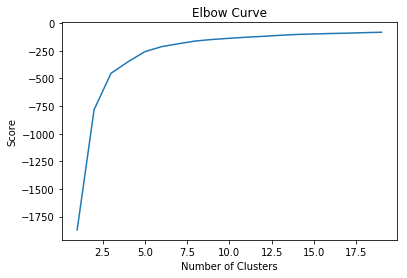

In [119]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Our Elbow point is around cluster size of 5. We will use k=5 to further interpret our clustering result. I'm prefering this number for ease of interpretation in this demo. We can also pick a higher number like 9.

In [120]:
km = KMeans(5)
km.fit(p_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [121]:
len(km.labels_)

45203

In [122]:
c_df['clusters'] = km.labels_

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [123]:
c_df.head(10)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,adult,clusters
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story,0.0,3
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji,0.0,3
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,0.0,4
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale,0.0,4
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,0.0,4
5,60000000,17.9249,187436818.0,170.0,7.7,1886.0,Heat,0.0,3
6,58000000,6.67728,0.0,127.0,6.2,141.0,Sabrina,0.0,4
7,0,2.56116,0.0,97.0,5.4,45.0,Tom and Huck,0.0,4
8,35000000,5.23158,64350171.0,106.0,5.5,174.0,Sudden Death,0.0,4
9,58000000,14.686,352194034.0,130.0,6.6,1194.0,GoldenEye,0.0,3


In [124]:
c_df.groupby(['clusters']).count()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,adult
clusters,,,,,,,,
0,12897,12897,12897,12897,12897,12897,12897,12897
1,3260,3260,3260,3260,3260,3260,3260,3260
2,9124,9124,9124,9124,9124,9124,9124,9124
3,812,812,812,812,812,812,812,812
4,19110,19110,19110,19110,19110,19110,19110,19110


In [125]:
c_df.groupby(['clusters']).count()['budget'].values

array([12897,  3260,  9124,   812, 19110], dtype=int64)

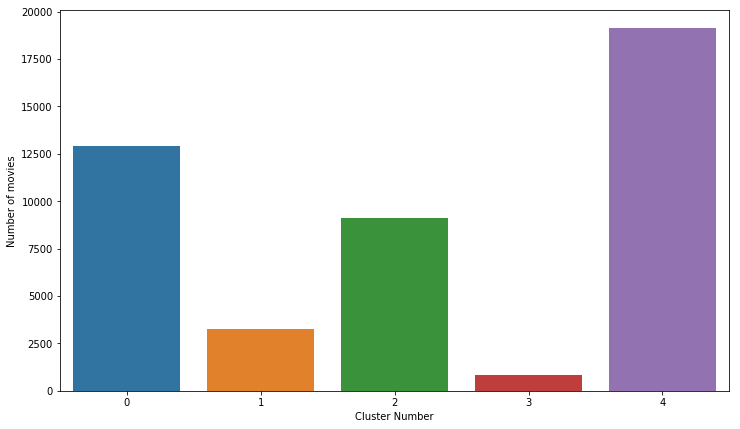

In [126]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=c_df.groupby(['clusters']).count()['budget'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [127]:
c_df.groupby(['clusters']).mean()

,revenue,runtime,vote_average,vote_count,adult
clusters,,,,,
0,6.262097e+06,99.043964,7.331713,103.002326,0.000000
1,1.656690e+04,77.231902,0.173681,0.461043,0.000613
2,1.646743e+06,88.998246,4.386355,21.917909,0.000438
3,3.513403e+08,120.072660,6.541379,2647.754926,0.000000
4,6.721287e+06,95.039874,5.965897,68.830246,0.000157


In [135]:
size_array = list(c_df.groupby(['clusters']).count()['budget'].values)
c_df[c_df['clusters']==size_array.index(sorted(size_array)[0])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,adult,clusters
147,52000000,18.7615,355237933.0,140.0,7.3,1637.0,Apollo 13,0.0,3
8250,155000000,13.4986,167298192.0,175.0,5.6,957.0,Alexander,0.0,3
12675,90000000,13.1165,201596308.0,113.0,5.5,1068.0,You Don't Mess with the Zohan,0.0,3
6019,78000000,11.4156,179179718.0,103.0,5.0,1551.0,Daredevil,0.0,3
16054,65000000,11.7396,211780824.0,95.0,6.2,1737.0,Due Date,0.0,3


In [134]:
c_df[c_df['adult'] == 1]

,budget,popularity,revenue,runtime,vote_average,vote_count,title,adult,clusters
19489,0,1.4201,0.0,112.0,2.2,7.0,Erotic Nights of the Living Dead,1.0,1
28701,0,1.34974,0.0,91.0,4.8,5.0,Standoff,1.0,2
31934,0,0.001803,0.0,89.0,0.0,0.0,Electrical Girl,1.0,1
32113,0,6.88983,0.0,72.0,4.0,12.0,Diet of Sex,1.0,2
39901,0,0.587751,0.0,0.0,6.3,8.0,Amateur Porn Star Killer 2,1.0,4
39902,0,0.417214,0.0,90.0,3.3,7.0,The Band,1.0,2
40574,0,1.182635,0.0,92.0,5.8,13.0,The Sinful Dwarf,1.0,4
41009,750000,1.13377,0.0,80.0,5.2,16.0,Adulterers,1.0,4
43090,0,0.28268,0.0,0.0,3.7,3.0,Half -Life,1.0,2
